# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
from utils import get_dataset

In [6]:
dataset = get_dataset("data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [7]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # create color map for the classes
    color_map = {1: [1,0,0],4:[0,1,0],2:[0,0,1]}
    
    plt.rcParams['figure.figsize'] = (10,10)
    for element in batch:
        # plot sample
        fig, ax = plt.subplots()
        ax.imshow(element['image'].numpy())
        scale = element['image'].numpy().shape[0]
        
        # plot sample bounding box
        bboxes = element['groundtruth_boxes'].numpy()
        classes = element['groundtruth_classes'].numpy()
        for bb, cl in zip(bboxes,classes):
            y1, x1, y2, x2 = bb*scale
            rec = Rectangle((x1,y1),x2-x1,y2-y1,facecolor='none',edgecolor=color_map[cl])
            ax.add_patch(rec)
        plt.show()
        plt.tight_layout()
        

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

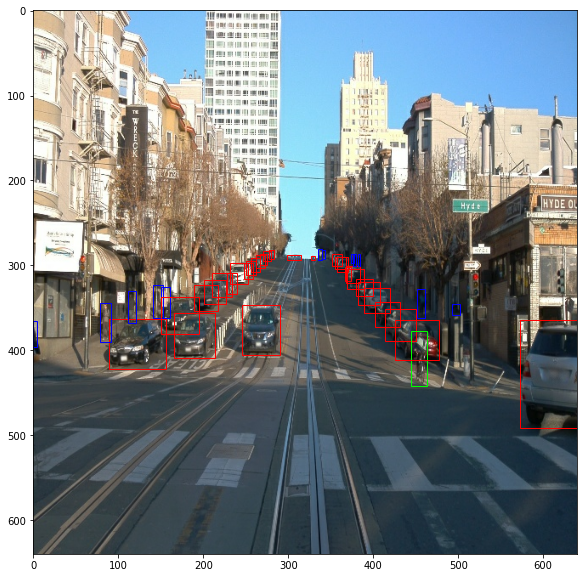

<Figure size 720x720 with 0 Axes>

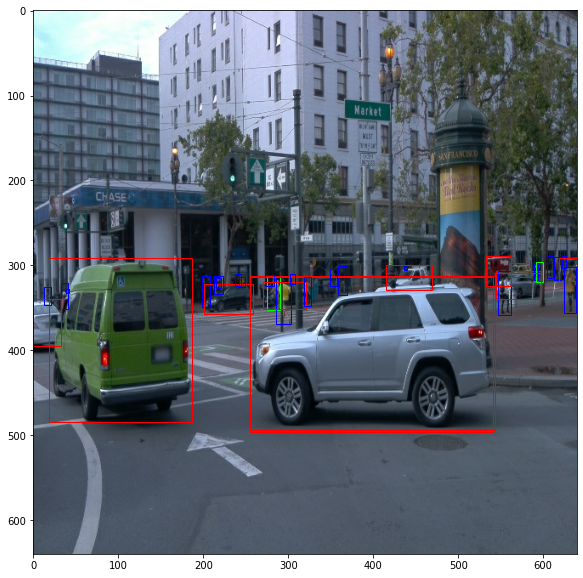

<Figure size 720x720 with 0 Axes>

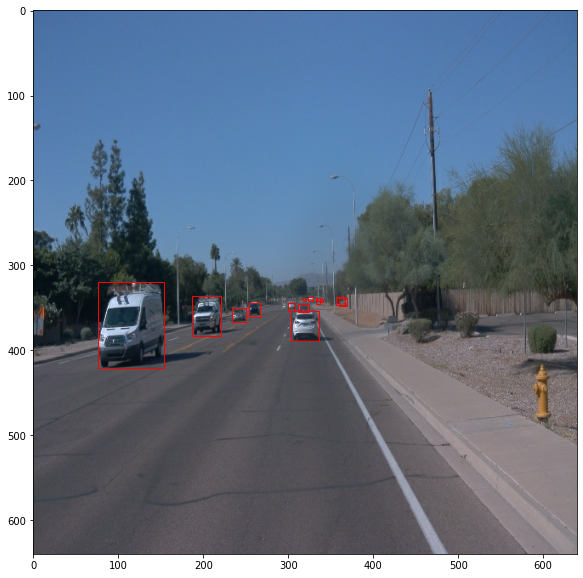

<Figure size 720x720 with 0 Axes>

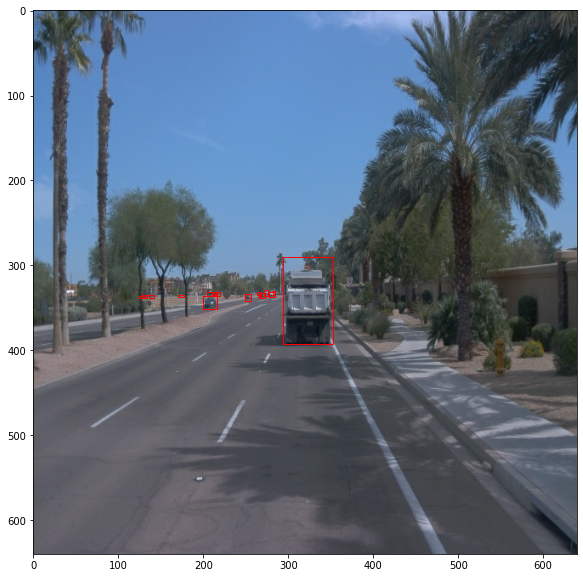

<Figure size 720x720 with 0 Axes>

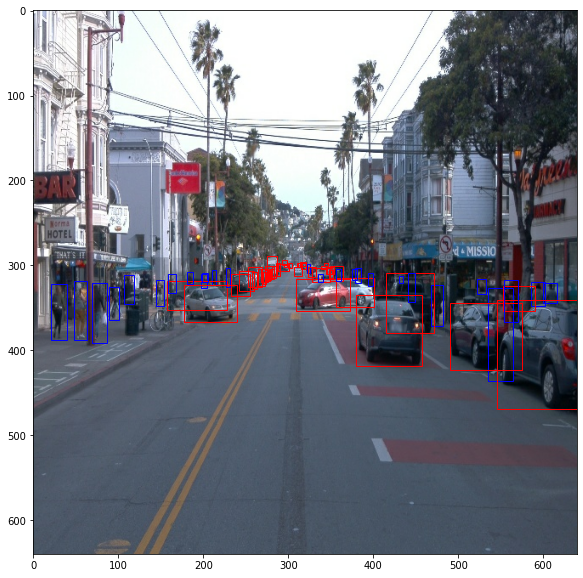

<Figure size 720x720 with 0 Axes>

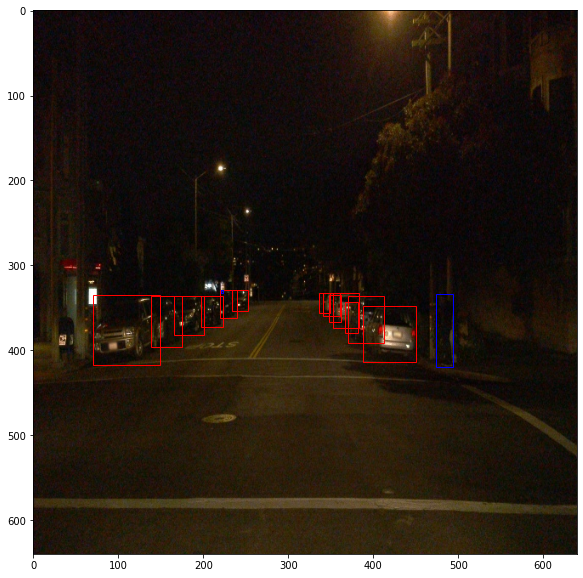

<Figure size 720x720 with 0 Axes>

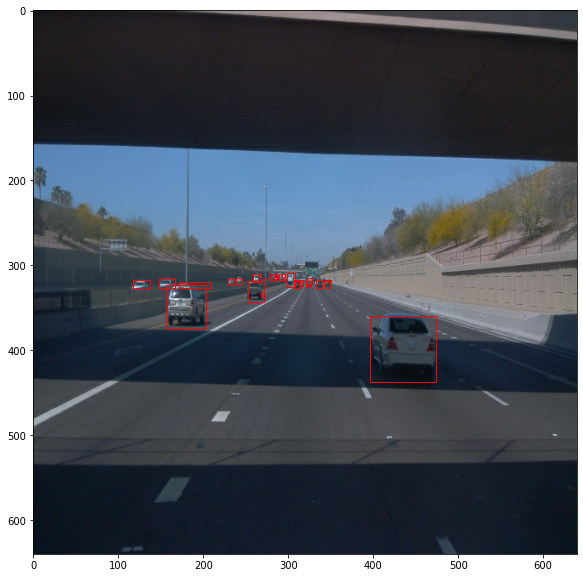

<Figure size 720x720 with 0 Axes>

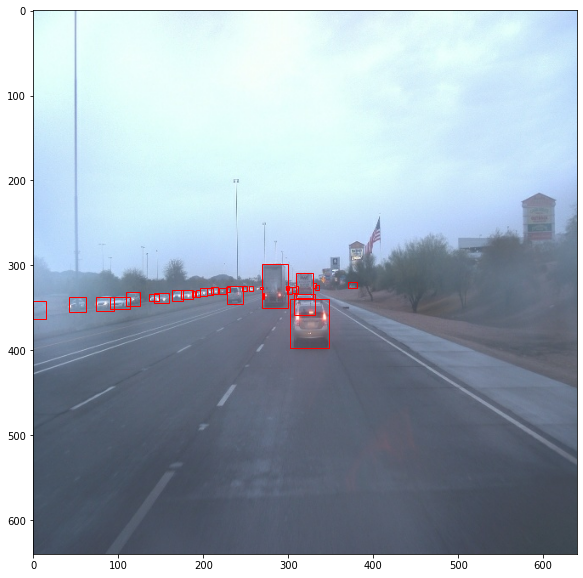

<Figure size 720x720 with 0 Axes>

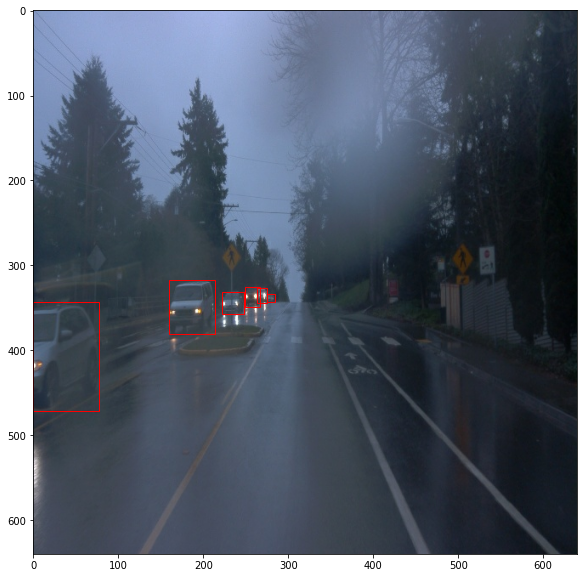

<Figure size 720x720 with 0 Axes>

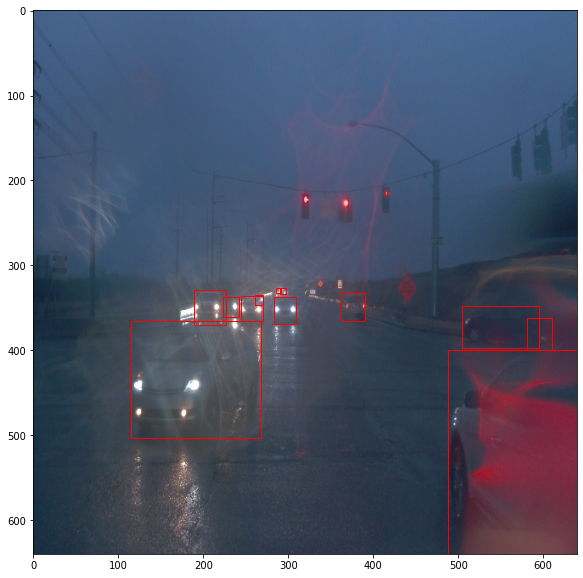

<Figure size 720x720 with 0 Axes>

In [8]:
## shuffle dataset and display 10 images
dataset = dataset.shuffle(97)
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [9]:
# calculate the total amount of cyclists, pedestrians and cars
def calculate_area(bbox):
    y1, x1, y2, x2 = bbox;
    return (x2 - x1) * (y2 - y1)

cars = 0
pedestrians = 0
cyclists = 0
total_predictions = 0.0
avg_bb_car_area = 0.0
avg_bb_cyclist_area = 0.0
avg_bb_pedestrian_area = 0.0
for element in dataset.take(10000): # analyze a bigger batch
    classes = element['groundtruth_classes'].numpy()
    bboxes = element['groundtruth_boxes'].numpy()
    for cl, bb in zip(classes,bboxes):
        # 1 - cars
        # 4 - cyclists
        # 2 - pedestrians
        if cl == 1:
            cars += 1
            avg_bb_car_area += calculate_area(bb)
        elif cl == 2:
            pedestrians += 1
            avg_bb_pedestrian_area += calculate_area(bb)
        elif cl ==4:
            cyclists += 1
            avg_bb_cyclist_area += calculate_area(bb)
        total_predictions += 1
print("Percentage of cars: ",cars / total_predictions)
print("Percentage of pedestrians ",pedestrians / total_predictions)
print("Percentage of cyclists: ", cyclists / total_predictions)
print("Average car bbox area: ",avg_bb_car_area / cars)
print("Average pedestrian bbox area: ",avg_bb_car_area / pedestrians)
print("Average cyclist bbox area: ",avg_bb_cyclist_area / cyclists)

Percentage of cars:  0.7652805376224874
Percentage of pedestrians  0.22886480124853953
Percentage of cyclists:  0.0058546611289731106
Average car bbox area:  0.005260487956495461
Average pedestrian bbox area:  0.017590075142798554
Average cyclist bbox area:  0.002043835099788139


In [13]:
# caluculate the amount of each object per record
from glob import glob
predictions_map = {}
for idx, file_name in enumerate(glob("data/waymo/training_and_validation/*.tfrecord")):
    file_data_set = get_dataset(file_name)
    cars = 0
    pedestrians = 0
    cyclists = 0
    total_predictions = 0
    file_data_set.shuffle(100)
    for element in file_data_set.take(100): # take 100 samples
        classes = element['groundtruth_classes'].numpy()
        for cl in classes:
            if cl == 1:
                cars += 1
            elif cl == 2:
                pedestrians += 1
            elif cl ==4:
                cyclists += 1
            total_predictions += 1
    predictions_map[file_name] = (cars/total_predictions, pedestrians/total_predictions, cyclists/total_predictions)

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10455472356147194054_1560_000_1580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10455472356147194054_1560_000_1580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11004685739714500220_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validatio

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validatio

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10235335145367115211_5420_000_5440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

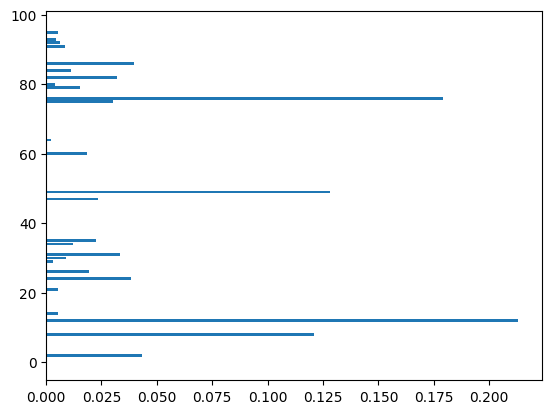

In [47]:
import numpy as np
cyclists_arr = []
pred_file = []
selected_files = []
for pred in predictions_map.items():
    cyclists_arr.append(pred[1][2])
    pred_file.append(pred[0])
    if pred[1][2] > 0.01: # twice as much as the average
        selected_files.append(pred[0])
y_pos = np.arange(len(pred_file))
plt.rcdefaults()
_,ax = plt.subplots()
ax.barh(y_pos, cyclists_arr)
plt.show()

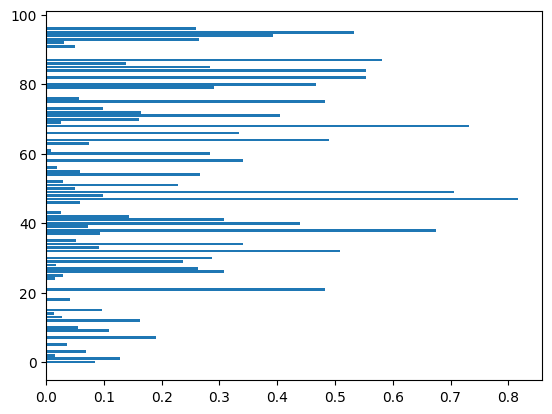

In [48]:
pedestrians_arr = []
pred_file = []
for pred in predictions_map.items():
    pedestrians_arr.append(pred[1][1])
    if pred[1][1] > 0.5: # twice as much as the average
        selected_files.append(pred[0])
plt.rcdefaults()
_,ax = plt.subplots()
ax.barh(y_pos, pedestrians_arr)
plt.show()

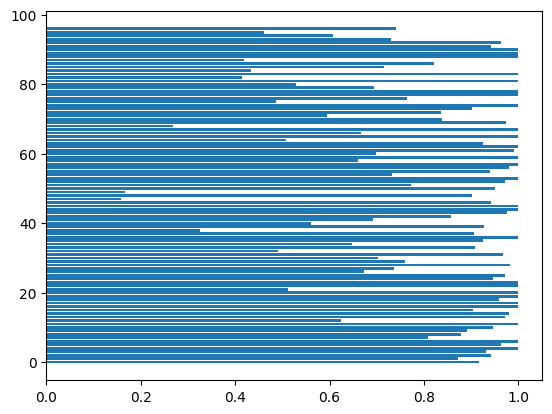

In [49]:
cars_arr = []
pred_file = []
for pred in predictions_map.items():
    cars_arr.append(pred[1][0])
    if pred[1][0] < 0.20: # most diverse set
        selected_files.append(pred[0])
plt.rcdefaults()
_,ax = plt.subplots()
ax.barh(y_pos, cars_arr)
plt.show()

In [50]:
selected_files = list(dict.fromkeys(selected_files)) # eliminate duplicates and print list
print(len(selected_files))
print(selected_files)

22
['data/waymo/training_and_validation/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-10596949720463106554_1933_530_1953_530_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord', 'data/waymo/training_and_validation/segment-11113047206980595400_2560_000_2580_000_with_camera_la

## Conclusion:
    - any training/test split must preserve the same proportion of cyclists, cars, and pedestrians as in the total dataset. So any split set must have proportionally the same amount of objects which has to be detected. There is small amount of cyclist compared to pedestrians and cars, which means that the model will perform better on detecting cars than any of the other object. In order to avoid that the model does not recognize any cyclists, a good proportion of it should be in the training set.
    - also the frames from the same tfrecord should not be used for both training and validation sets, in order to avoid overfitting
    - the average area of a bounding box is calculated, in order to eliminate detection of very small objects. These gives the idea of what shoulbe a small object, in order to not consider them for training.
    - in order to train the model with a good amount of each object in the sample, the selected list is created and selected with the most diverse records.

In [51]:
# save selected files list
sel_files = open("selected_files.txt","w")
for file in selected_files:
    sel_files.write(file + "\n")
sel_files.close()